### Project one: Numerical solution to Kepler's problem for Earth-Sun system


152000000000.0 1.5707963267948966 0.0 0.0


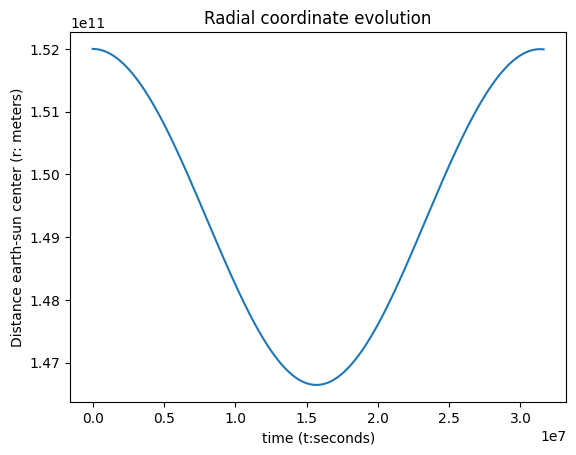

In [12]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve

G = 6.67e-11
M_sun = 2e+30
Rt = 152e9
T = 31622400. #año en segundos


def System(t,r0):
    
    r,theta,vr,vtheta = r0
    
    ar = - G*M_sun/r**2 + r*vtheta**2
    at = - 2*vr*vtheta / r
    
    return np.array([vr,vtheta,ar,at])

v0 = 0.991*np.sqrt(G*M_sun/Rt**3)
theta0 = np.pi/2.
r0_ = np.array([ Rt*np.cos(theta0), Rt*np.sin(theta0) ])
alpha = np.deg2rad(90)#83
v0_ = np.array([ v0*np.cos(alpha), v0*np.sin(alpha) ])
N = 500
t = np.linspace(0.,T,N+1) #  el tiempo es 365*24*3600

r0 = np.array([Rt,theta0,v0_[0],v0_[1]])
solution = solve_ivp( System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45' )
t = solution.t
r = solution.y[0]
theta = solution.y[1]
ii = np.argmax(r)
maxr = r[ii]
maxtheta = theta[ii]
maxt = t[ii]
print(maxr,maxtheta,maxt, maxt/60.)


fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.set_title("Radial coordinate evolution")
ax1.set_xlabel("time (t:seconds)")
ax1.set_ylabel("Distance earth-sun center (r: meters)")
ax1.plot(t,r)

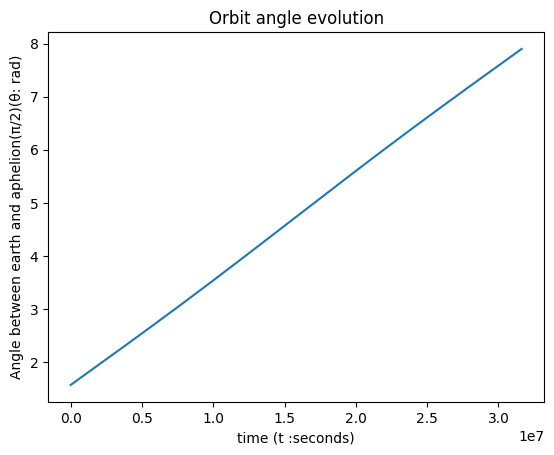

In [13]:
fig2 = plt.figure()
ax1 = fig2.add_subplot()
ax1.set_title("Orbit angle evolution")
ax1.set_xlabel("time (t :seconds)")
ax1.set_ylabel("Angle between earth and aphelion(π/2)(θ: rad)")
ax1.plot(t,theta)

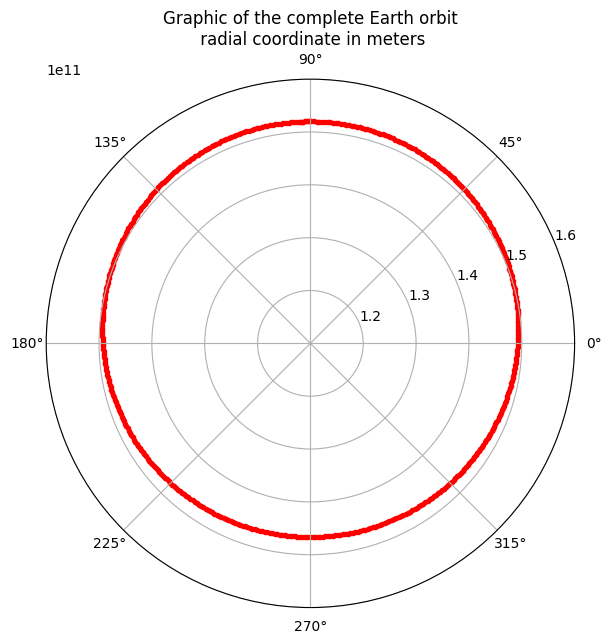

In [14]:
x = r*np.cos(theta)
y = r*np.sin(theta)
M = np.array([[0,-1],[1,0]])
v10_ = 100.0*np.dot( M, v0_ )
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1, projection='polar')
ax1.set_rlim(1.1e11,1.6e11)
ax1.set_title("Graphic of the complete Earth orbit\n radial coordinate in meters")

#ax2 = fig.add_subplot(1,2,2,)
ax1.scatter(theta,r,marker='.',color='r')


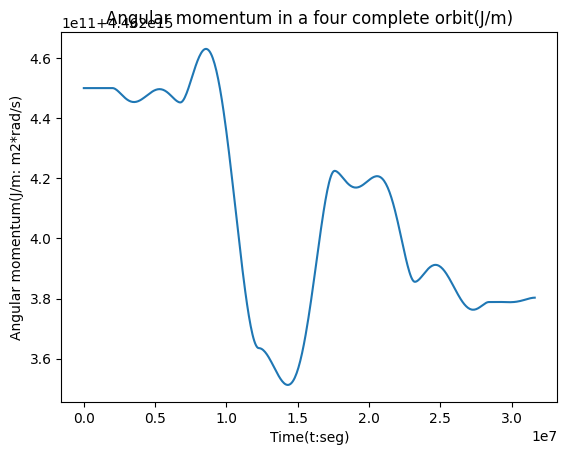

In [15]:

v_r = solution.y[2]
v_theta = solution.y[3]




fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Angular momentum in a four complete orbit(J/m)")
ax.set_xlabel("Time(t:seg)")
ax.set_ylabel("Angular momentum(J/m: m2*rad/s)")
ax.plot(t, v_theta*r**2)


In [16]:
ii = np.argmax(r)
maxr = r[ii]
jj = np.argmin(r)
minr = r[jj]
print(minr,maxr)

a = (maxr + minr)/2
T = 31622400 #segundos
resul = T**2/a**3  
resul_2 = 4*np.pi**2/(G*M_sun)
p = resul-resul_2
p

146644239310.1871 152000000000.0


4.402632477095284e-21

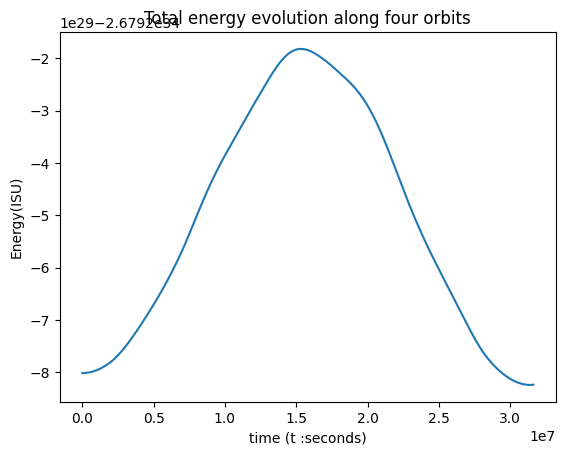

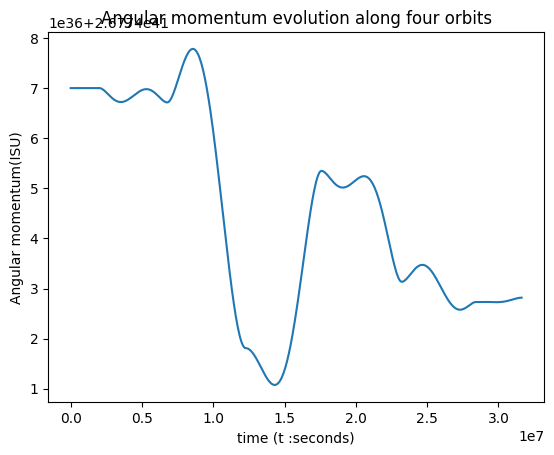

In [17]:
m_t = 6*10e24
e = (1- 4*maxr*minr/(maxr + minr)**2)*(1/2)
E = M_sun*m_t*G/(2*a)# energia teorica
J_square = a*(1-e**2)*G*M_sun*m_t**2
J = J_square**(1/2) # momento angular teorico
E_2 = 1/2 * m_t*(v_r**2 + J_square/(m_t**2 *r**2)) - G*M_sun*m_t/r
J_2 = m_t*r**2*v_theta
avE_2  = np.average(E_2)
avJ = np.average(J_2)
e, E,avE_2, J ,avJ

fig3 = plt.figure()
ax1 = fig3.add_subplot()
ax1.set_title("Total energy evolution along four orbits")
ax1.set_xlabel("time (t :seconds)")
ax1.set_ylabel("Energy(ISU)")
ax1.plot(t,E_2)
plt.show()

fig4 = plt.figure()
ax1 = fig4.add_subplot()
ax1.set_title("Angular momentum evolution along four orbits")
ax1.set_xlabel("time (t :seconds)")
ax1.set_ylabel("Angular momentum(ISU)")
ax1.plot(t,J_2)
plt.show()

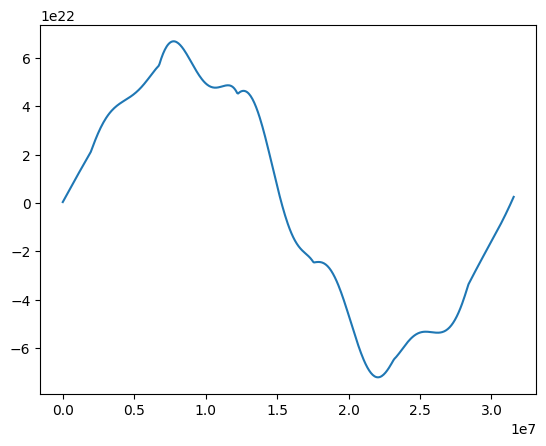

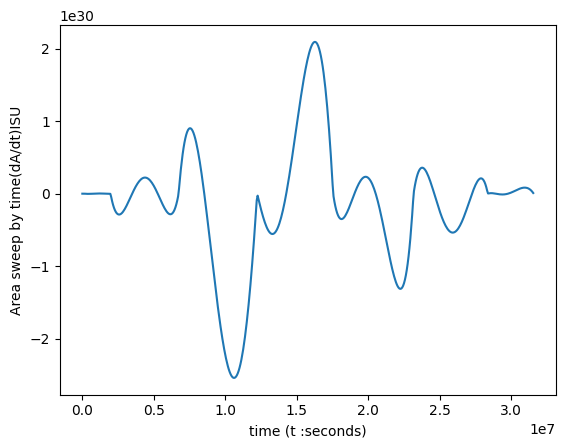

In [18]:
dEdt = np.diff(E_2)/np.diff(t)
dJdt = np.diff(J_2)/np.diff(t)
t_new = t[:-1]

plt.plot( t_new,dEdt)
plt.show()

fig3 = plt.figure()
ax1 = fig3.add_subplot()
ax1.set_title("")
ax1.set_xlabel("time (t :seconds)")
ax1.set_ylabel("Area sweep by time(dA/dt)ISU")
ax1.plot(t_new,dJdt)
plt.show()


In [19]:

IEmodel = integrate.simpson(E_2,t)
IEtheory = -E*T
perLostEnergy = 100*np.abs(IEmodel - IEtheory) /np.abs(IEtheory)

IJmodel = integrate.simpson(J_2,t)
IJtheory = J*T
perLostMomentum = 100*np.abs(IJmodel-IJtheory)/np.abs(IJtheory)

IEmodel, IEtheory, IJmodel, IJtheory,perLostEnergy, perLostMomentum

(-8.472434336918803e+41,
 -8.47515727022317e+41,
 8.466723672666902e+48,
 8.46810160969031e+48,
 0.03212841033562251,
 0.016272088915779165)